# Chapter 3: Exercise 14

## Exploring Collinearity

**Import packages**

In [1]:
import numpy as np
import pandas as pd
# import matplotlib.pyplot as plt
import statsmodels.api as sm
# from statsmodels.stats.anova import anova_lm
from ISLP.models import (ModelSpec as MS, summarize)

### (a) Perform some commands

In [2]:
rng = np.random.default_rng (10)
x1 = rng.uniform(0, 1, size=100)
x2 = 0.5 * x1 + rng.normal(size=100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rng.normal(size=100)

Form of linear model: $$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$
$$y = 2 + 2 X_1 + 0.3 X_2 + \epsilon$$

Regression Coefficients: 
- $\beta_0 = 2$
- $\beta_1 = 2$
- $\beta_2 = 0.3$

### (b) Correlation and scatterplot between $x1$ and $x2$

In [3]:
df = pd.DataFrame({'x1': x1, 'x2': x2})

In [4]:
np.corrcoef(x1, x2);

In [5]:
df.corr()

,x1,x2
x1,1.000000,0.772324
x2,0.772324,1.000000


The correlation between $x1$ and $x2$ is $0.7723245$

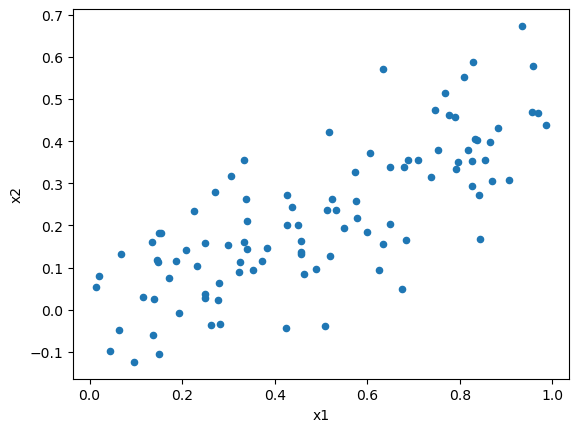

In [6]:
df.plot.scatter('x1', 'x2');

### (c) Fit a least squares regression to predict y given x1, x2

In [7]:
X = MS(['x1', 'x2']).fit_transform(df)

In [8]:
model = sm.OLS(y, X)
result = model.fit()

In [9]:
result.summary();
summarize(result)

,coef,std err,t,P>|t|
intercept,1.9579,0.190,10.319,0.000
x1,1.6154,0.527,3.065,0.003
x2,0.9428,0.831,1.134,0.259


- $\hat{\beta_0} = 1.9579$, $\beta_0 = 2$
- $\hat{\beta_1} = 1.6154$, $\beta_1 = 2$
- $\hat{\beta_2} = 0.9428$, $\beta_2 = 0.3$

The coefficient estimates are okay.

We can reject $H_0: \beta_1 = 0$ since $p=0.003$ is small. We **cannot** reject $H_0: \beta_2 = 0$ since $p=0.259$ is not small.